In [15]:
# load dataset using read_csv()
from pandas import read_csv
series = read_csv('Data/daily-total-female-births-in-cal.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
print(type(series))
print(series.head())

<class 'pandas.core.series.Series'>
Date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
Name: Daily total female births in California, 1959, dtype: int64


In [6]:
# summarize the dimensions of a time series
print(series.size)

365


In [7]:
# query a dataset using a date-time index
print(series['1959-01'])

Date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
1959-01-06    29
1959-01-07    45
1959-01-08    43
1959-01-09    38
1959-01-10    27
1959-01-11    38
1959-01-12    33
1959-01-13    55
1959-01-14    47
1959-01-15    45
1959-01-16    37
1959-01-17    50
1959-01-18    43
1959-01-19    41
1959-01-20    52
1959-01-21    34
1959-01-22    53
1959-01-23    39
1959-01-24    32
1959-01-25    37
1959-01-26    43
1959-01-27    39
1959-01-28    35
1959-01-29    44
1959-01-30    38
1959-01-31    24
Name: Daily total female births in California, 1959, dtype: int64


In [9]:
print(series['1959-01-01'])

35


In [11]:
# calculate descriptive statistics
print(series.describe())

count    365.000000
mean      41.980822
std        7.348257
min       23.000000
25%       37.000000
50%       42.000000
75%       46.000000
max       73.000000
Name: Daily total female births in California, 1959, dtype: float64


In [16]:
#NEW DATASET
# create date time features of a dataset
from pandas import read_csv
from pandas import DataFrame
series = read_csv('Data/data_daily-minimum-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
dataframe = DataFrame()
dataframe['month'] = [series.index[i].month for i in range(len(series))]
dataframe['day'] = [series.index[i].day for i in range(len(series))]
dataframe['temperature'] = [series[i] for i in range(len(series))]
print(dataframe.head(5))

   month  day  temperature
0      1    1         20.7
1      1    2         17.9
2      1    3         18.8
3      1    4         14.6
4      1    5         15.8


Using just the month and day information alone to predict temperature is not sophisticated and will likely result in a poor model. Nevertheless, this information coupled with additional engineered features may ultimately result in a better model. You may enumerate all the properties of a time-stamp and consider what might be useful for your problem, such as:

Minutes elapsed for the day.
Hour of day.
Business hours or not.
Weekend or not.
Season of the year.
Business quarter of the year.
Daylight savings or not.
Public holiday or not.
Leap year or not.

In [17]:
# create a lag feature
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
series = read_csv('Data/data_daily-minimum-temperatures.csv', header=0, index_col=0,
parse_dates=True, squeeze=True)
temps = DataFrame(series.values)
dataframe = concat([temps.shift(1), temps], axis=1)
dataframe.columns = ['t', 't+1']
print(dataframe.head(5))

      t   t+1
0   NaN  20.7
1  20.7  17.9
2  17.9  18.8
3  18.8  14.6
4  14.6  15.8


In [18]:
# create lag features
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
series = read_csv('data/data_daily-minimum-temperatures.csv', header=0, index_col=0,
parse_dates=True, squeeze=True)
temps = DataFrame(series.values)
dataframe = concat([temps.shift(3), temps.shift(2), temps.shift(1), temps], axis=1)
dataframe.columns = ['t-2', 't-1', 't', 't+1']
print(dataframe.head(5))

    t-2   t-1     t   t+1
0   NaN   NaN   NaN  20.7
1   NaN   NaN  20.7  17.9
2   NaN  20.7  17.9  18.8
3  20.7  17.9  18.8  14.6
4  17.9  18.8  14.6  15.8


In [19]:
# create a rolling mean feature
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
series = read_csv('data/data_daily-minimum-temperatures.csv', header=0, index_col=0,
parse_dates=True, squeeze=True)
temps = DataFrame(series.values)
shifted = temps.shift(1)
window = shifted.rolling(window=2)
means = window.mean()
dataframe = concat([means, temps], axis=1)
dataframe.columns = ['mean(t-1,t)', 't+1']
print(dataframe.head(5))

   mean(t-1,t)   t+1
0          NaN  20.7
1          NaN  17.9
2        19.30  18.8
3        18.35  14.6
4        16.70  15.8


In [20]:
# create rolling statistics features
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
series = read_csv('data/data_daily-minimum-temperatures.csv', header=0, index_col=0,
parse_dates=True, squeeze=True)
temps = DataFrame(series.values)
width = 3
shifted = temps.shift(width - 1)
window = shifted.rolling(window=width)
dataframe = concat([window.min(), window.mean(), window.max(), temps], axis=1)
dataframe.columns = ['min', 'mean', 'max', 't+1']
print(dataframe.head(5))

    min       mean   max   t+1
0   NaN        NaN   NaN  20.7
1   NaN        NaN   NaN  17.9
2   NaN        NaN   NaN  18.8
3   NaN        NaN   NaN  14.6
4  17.9  19.133333  20.7  15.8


In [21]:
# create expanding window features
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
series = read_csv('Data/data_daily-minimum-temperatures.csv', header=0, index_col=0,
parse_dates=True, squeeze=True)
temps = DataFrame(series.values)
window = temps.expanding()
dataframe = concat([window.min(), window.mean(), window.max(), temps.shift(-1)], axis=1)
dataframe.columns = ['min', 'mean', 'max', 't+1']
print(dataframe.head(5))

    min       mean   max   t+1
0  20.7  20.700000  20.7  17.9
1  17.9  19.300000  20.7  18.8
2  17.9  19.133333  20.7  14.6
3  14.6  18.000000  20.7  15.8
4  14.6  17.560000  20.7  15.8


# Stationarity of a Time Series

In [24]:
# load time series data
from pandas import read_csv
from matplotlib import pyplot
series = read_csv('Data/daily-total-female-births-in-cal.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

In [25]:
series.plot()

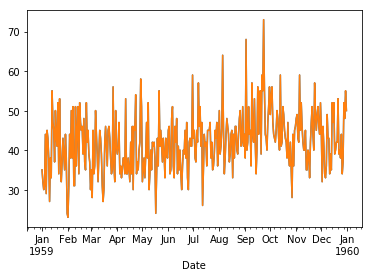

In [26]:
from pandas import Series
from matplotlib import pyplot
series.plot()
pyplot.show()

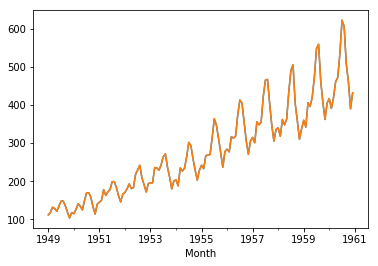

In [28]:
# load time series data
from pandas import read_csv
from matplotlib import pyplot
series = read_csv('Data/AirPassengers.csv', header=0, index_col=0, parse_dates=True,squeeze=True)
series.plot()
pyplot.show()

# Summary Statistics to Check Stationarity of a Time Series

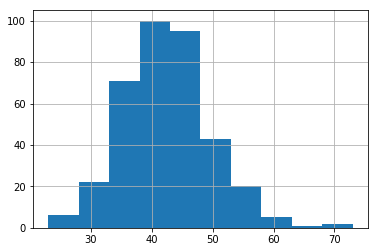

In [29]:
# plot a histogram of a time series
from pandas import read_csv
from matplotlib import pyplot
series = read_csv('Data/daily-total-female-births-in-cal.csv', header=0, index_col=0, parse_dates=True,
squeeze=True)
series.hist()
pyplot.show()

In [31]:
# calculate statistics of partitioned time series data
from pandas import read_csv
series = read_csv('Data/daily-total-female-births-in-cal.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
X = series.values
split = int(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=39.763736, mean2=44.185792
variance1=49.213410, variance2=48.708651


# Augmented Dickey-Fuller test

Statistical tests make strong assumptions about your data. They can only be used to inform the degree to which a null hypothesis can be rejected (or fail to be rejected). The result must be interpreted for a given problem to be meaningful. Nevertheless, they can provide a quick check to see whether your time series is stationary or non-stationary. The Augmented Dickey-Fuller test is a type of statistical test called a unit root test. The intuition behind a unit root test is that it determines how strongly a time series is defined by a trend.

In [32]:
# calculate stationarity test of time series data
from pandas import read_csv
from statsmodels.tsa.stattools import adfuller
series = read_csv('Data/daily-total-female-births-in-cal.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
X = series.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

C:\Users\sbean\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


ADF Statistic: -4.808291
p-value: 0.000052
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571


In [33]:
# calculate stationarity test of time series data
from pandas import read_csv
from statsmodels.tsa.stattools import adfuller
series = read_csv('Data/AirPassengers.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
X = series.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.815369
p-value: 0.991880
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


# Differencing to Remove Seasonality

In [34]:
# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return Series(diff)

In [35]:
# invert differenced forecast
def inverse_difference(last_ob, value):
    return value + last_ob

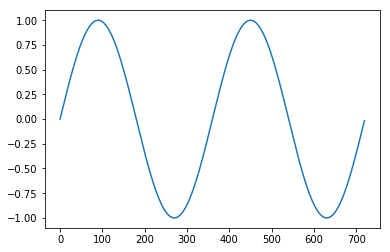

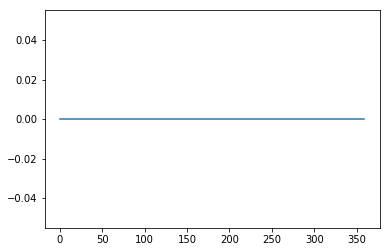

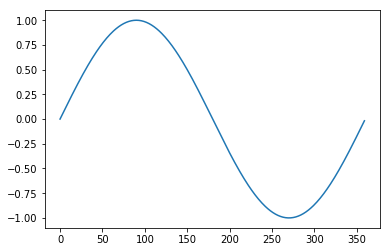

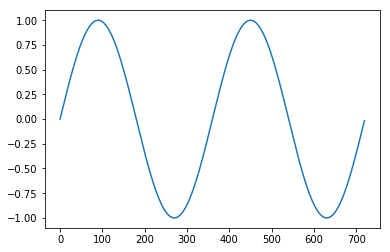

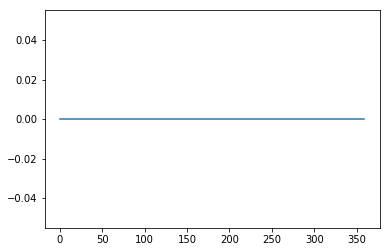

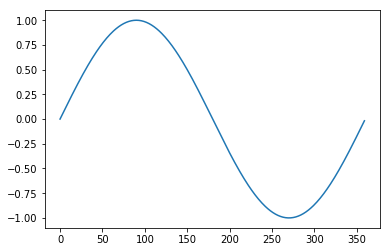

In [36]:
from math import sin
from math import radians
from matplotlib import pyplot

# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return diff

# invert differenced forecast
def inverse_difference(last_ob, value):
    return value + last_ob

# define a dataset with a linear trend
data = [sin(radians(i)) for i in range(360)] + [sin(radians(i)) for i in range(360)]
pyplot.plot(data)
pyplot.show()
# difference the dataset
diff = difference(data, 360)
pyplot.plot(diff)
pyplot.show()
# invert the difference
inverted = [inverse_difference(data[i], diff[i]) for i in range(len(diff))]
pyplot.plot(inverted)
pyplot.show()

from math import sin
from math import radians
from matplotlib import pyplot
 
# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return diff
 
# invert differenced forecast
def inverse_difference(last_ob, value):
    return value + last_ob
 
# define a dataset with a linear trend
data = [sin(radians(i)) for i in range(360)] + [sin(radians(i)) for i in range(360)]
pyplot.plot(data)
pyplot.show()
# difference the dataset
diff = difference(data, 360)
pyplot.plot(diff)
pyplot.show()
# invert the difference
inverted = [inverse_difference(data[i], diff[i]) for i in range(len(diff))]
pyplot.plot(inverted)
pyplot.show()

# Autoregression Models for Forecasting

Autoregression is a time series model that uses observations from previous time steps as input to a regression equation to predict the value at the next time step. It is a very simple idea that can result in accurate forecasts on a range of time series problems. In this notebook, you will discover how to implement an autoregressive model for time series forecasting with Python.

In [37]:
# create and evaluate a static autoregressive model
from pandas import read_csv
from matplotlib import pyplot

Lag: 29
Coefficients: [ 5.57543506e-01  5.88595221e-01 -9.08257090e-02  4.82615092e-02
  4.00650265e-02  3.93020055e-02  2.59463738e-02  4.46675960e-02
  1.27681498e-02  3.74362239e-02 -8.11700276e-04  4.79081949e-03
  1.84731397e-02  2.68908418e-02  5.75906178e-04  2.48096415e-02
  7.40316579e-03  9.91622149e-03  3.41599123e-02 -9.11961877e-03
  2.42127561e-02  1.87870751e-02  1.21841870e-02 -1.85534575e-02
 -1.77162867e-03  1.67319894e-02  1.97615668e-02  9.83245087e-03
  6.22710723e-03 -1.37732255e-03]
predicted=11.871275, expected=12.900000
predicted=13.053794, expected=14.600000
predicted=13.532591, expected=14.000000
predicted=13.243126, expected=13.600000
predicted=13.091438, expected=13.500000
predicted=13.146989, expected=15.700000
predicted=13.176153, expected=13.000000
Test RMSE: 1.225


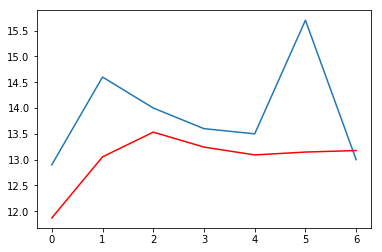

In [38]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
from math import sqrt

# load dataset
series = read_csv('Data/data_daily-minimum-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

# split dataset
X = series.values
train, test = X[1:len(X)-7], X[len(X)-7:]

# train autoregression
model = AR(train)
model_fit = model.fit()
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)

# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

# plot results
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

predicted=11.871275, expected=12.900000
predicted=13.659297, expected=14.600000
predicted=14.349246, expected=14.000000
predicted=13.427454, expected=13.600000
predicted=13.374877, expected=13.500000
predicted=13.479991, expected=15.700000
predicted=14.765146, expected=13.000000
Test RMSE: 1.204


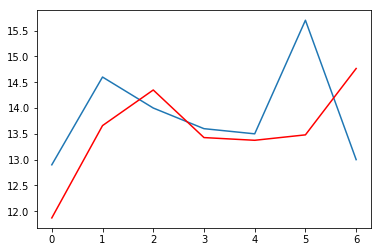

In [39]:
# create and evaluate an updated autoregressive model
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
from math import sqrt

# load dataset
series = read_csv('Data/data_daily-minimum-temperatures.csv', header=0, index_col=0,
    parse_dates=True, squeeze=True)
# split dataset
X = series.values
train, test = X[1:len(X)-7], X[len(X)-7:]
# train autoregression
model = AR(train)
model_fit = model.fit()
window = model_fit.k_ar
coef = model_fit.params
# walk forward over time steps in test
history = train[len(train)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(test)):
    length = len(history)
    lag = [history[i] for i in range(length-window,length)]
    yhat = coef[0]
    for d in range(window):
        yhat += coef[d+1] * lag[window-d-1]
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

# Moving Average Models for Forecasting

The residual errors from forecasts on a time series provide another source of information that we can model. Residual errors themselves form a time series that can have temporal structure. A simple autoregression model of this structure can be used to predict the forecast error, which in turn can be used to correct forecasts. In this notebook, you will discover how to model a residual error time series and use it to correct predictions with Python.

In [41]:
# autoregressive model of residual errors
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from statsmodels.tsa.ar_model import AR
series = read_csv('Data/daily-total-female-births-in-cal.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

In [42]:
# create lagged dataset
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']

# split into train and test sets
X = dataframe.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

# persistence model on training set
train_pred = [x for x in train_X]

# calculate residuals
train_resid = [train_y[i]-train_pred[i] for i in range(len(train_pred))]

# model the training set residuals
model = AR(train_resid)
model_fit = model.fit()
window = model_fit.k_ar
coef = model_fit.params
print('Lag=%d, Coef=%s' % (window, coef))

Lag=15, Coef=[ 0.10120699 -0.84940615 -0.77783609 -0.73345006 -0.68902061 -0.59270551
 -0.5376728  -0.42553356 -0.24861246 -0.19972102 -0.15954013 -0.11045476
 -0.14045572 -0.13299964 -0.12515801 -0.03615774]


In [43]:
# forecast residual forecast error
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from statsmodels.tsa.ar_model import AR
from matplotlib import pyplot
series = read_csv('Data/daily-total-female-births-in-cal.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

In [44]:
# create lagged dataset
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']

# split into train and test sets
X = dataframe.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

# persistence model on training set
train_pred = [x for x in train_X]

# calculate residuals
train_resid = [train_y[i]-train_pred[i] for i in range(len(train_pred))]

# model the training set residuals
model = AR(train_resid)
model_fit = model.fit()
window = model_fit.k_ar
coef = model_fit.params

# walk forward over time steps in test
history = train_resid[len(train_resid)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
expected_error = list()
for t in range(len(test_y)):
    # persistence
    yhat = test_X[t]
    error = test_y[t] - yhat
    expected_error.append(error)
    # predict error
    length = len(history)
    lag = [history[i] for i in range(length-window,length)]
    pred_error = coef[0]
    
    for d in range(window):
        pred_error += coef[d+1] * lag[window-d-1]
        predictions.append(pred_error)
        history.append(error)
        print('predicted error=%f, expected error=%f' % (pred_error, error))

predicted error=-0.748199, expected error=9.000000
predicted error=6.252326, expected error=9.000000
predicted error=4.785426, expected error=9.000000
predicted error=2.029343, expected error=9.000000
predicted error=-0.934184, expected error=9.000000
predicted error=-0.396512, expected error=9.000000
predicted error=2.156690, expected error=9.000000
predicted error=2.156690, expected error=9.000000
predicted error=0.558922, expected error=9.000000
predicted error=1.516162, expected error=9.000000
predicted error=0.301160, expected error=9.000000
predicted error=1.986629, expected error=9.000000
predicted error=1.853629, expected error=9.000000
predicted error=1.227839, expected error=9.000000
predicted error=1.155523, expected error=9.000000
predicted error=-7.543448, expected error=-10.000000
predicted error=-14.543973, expected error=-10.000000
predicted error=-21.145024, expected error=-10.000000
predicted error=-27.346209, expected error=-10.000000
predicted error=-32.680559, expe

predicted error=11.618656, expected error=-5.000000
predicted error=4.348238, expected error=-3.000000
predicted error=8.237418, expected error=-3.000000
predicted error=11.904668, expected error=-3.000000
predicted error=15.349772, expected error=-3.000000
predicted error=18.313299, expected error=-3.000000
predicted error=21.001663, expected error=-3.000000
predicted error=23.129331, expected error=-3.000000
predicted error=24.372393, expected error=-3.000000
predicted error=25.370998, expected error=-3.000000
predicted error=26.168699, expected error=-3.000000
predicted error=26.720973, expected error=-3.000000
predicted error=27.423251, expected error=-3.000000
predicted error=28.088250, expected error=-3.000000
predicted error=28.714040, expected error=-3.000000
predicted error=28.894828, expected error=-3.000000
predicted error=2.649425, expected error=19.000000
predicted error=4.982934, expected error=19.000000
predicted error=7.183284, expected error=19.000000
predicted error=9

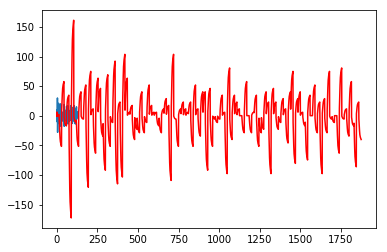

In [45]:
# plot predicted error
pyplot.plot(expected_error)
pyplot.plot(predictions, color='red')
pyplot.show()

# Correct Predictions with a Model of Residuals

In [46]:
# correct the prediction
yhat = yhat + pred_error

In [47]:
# correct forecasts with a model of forecast residual errors
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from statsmodels.tsa.ar_model import AR
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
from math import sqrt

# load data
series = read_csv('Data/daily-total-female-births-in-cal.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

# create lagged dataset
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']

# split into train and test sets
X = dataframe.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

# persistence model on training set
train_pred = [x for x in train_X]

# calculate residuals
train_resid = [train_y[i]-train_pred[i] for i in range(len(train_pred))]

# model the training set residuals
model = AR(train_resid)
model_fit = model.fit()
window = model_fit.k_ar
coef = model_fit.params

# walk forward over time steps in test
history = train_resid[len(train_resid)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(test_y)):
    # persistence
    yhat = test_X[t]
    error = test_y[t] - yhat
    # predict error
    length = len(history)
    lag = [history[i] for i in range(length-window,length)]
    pred_error = coef[0]
    for d in range(window):
        pred_error += coef[d+1] * lag[window-d-1]
    # correct the prediction
    yhat = yhat + pred_error
    predictions.append(yhat)
    history.append(error)
    print('predicted=%f, expected=%f' % (yhat, test_y[t]))
    
# error
rmse = sqrt(mean_squared_error(test_y, predictions))
print('Test RMSE: %.3f' % rmse)

predicted=43.155523, expected=51.000000
predicted=43.891191, expected=41.000000
predicted=44.007486, expected=44.000000
predicted=43.243554, expected=38.000000
predicted=43.511163, expected=68.000000
predicted=48.008736, expected=40.000000
predicted=44.842429, expected=42.000000
predicted=45.050883, expected=51.000000
predicted=45.858415, expected=44.000000
predicted=45.161119, expected=45.000000
predicted=44.758072, expected=36.000000
predicted=45.159826, expected=57.000000
predicted=49.882026, expected=44.000000
predicted=45.182992, expected=42.000000
predicted=44.769363, expected=53.000000
predicted=48.040663, expected=42.000000
predicted=44.566233, expected=34.000000
predicted=43.084498, expected=40.000000
predicted=43.020899, expected=56.000000
predicted=49.457902, expected=44.000000
predicted=45.328116, expected=53.000000
predicted=45.225588, expected=55.000000
predicted=48.705924, expected=39.000000
predicted=44.166344, expected=59.000000
predicted=45.621871, expected=55.000000


# ARIMA Model for Forecasting

A popular statistical method for time series forecasting is the ARIMA model. ARIMA is an acronym that stands for AutoRegressive Integrated Moving Average. It is a class of model that captures a suite of different standard temporal structures in time series data. In this notebook, you will discover how to develop an ARIMA model for time series data with Python.

We will use the Shampoo Sales dataset as an example. This dataset describes the monthly number of sales of shampoo over a 3 year period. The units are a sales count and there are 36 observations. The original dataset is credited to Makridakis, Wheelwright and Hyndman (1998).

In [50]:
# load and plot dataset
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot

# load dataset
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')
series = read_csv('Data/shampoo-sales.csv', header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)

# summarize first few rows
print(series.head())

Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales, dtype: float64


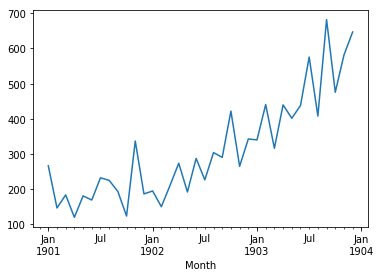

In [51]:
# line plot
series.plot()
pyplot.show()

In [52]:
# autocorrelation plot of time series
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot

# load dataset
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')
series = read_csv('Data\shampoo-sales.csv', header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)

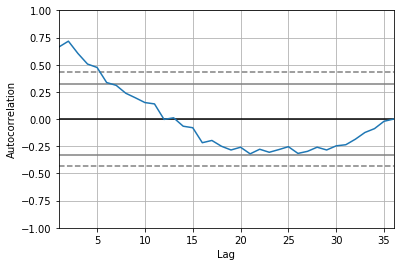

In [53]:
# autocorrelation plot
autocorrelation_plot(series)
pyplot.show()

In [54]:
# fit an ARIMA model and plot residual errors
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot

# load dataset
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')
series = read_csv('Data\shampoo-sales.csv', header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)

# fit model
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit(disp=0)

# summary of fit model
print(model_fit.summary())

C:\Users\sbean\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1360: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Users\sbean\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1363: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\Users\sbean\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1369: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an arra

                             ARIMA Model Results                              
Dep. Variable:                D.Sales   No. Observations:                   35
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -196.170
Method:                       css-mle   S.D. of innovations             64.241
Date:                Tue, 09 Apr 2019   AIC                            406.340
Time:                        20:18:06   BIC                            417.227
Sample:                    02-01-1901   HQIC                           410.098
                         - 12-01-1903                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            12.0649      3.652      3.304      0.003       4.908      19.222
ar.L1.D.Sales    -1.1082      0.183     -6.063      0.000      -1.466      -0.750
ar.L2.D.Sales    -0.6203      0.282     

C:\Users\sbean\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


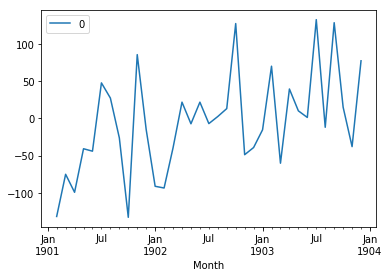

In [55]:
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()

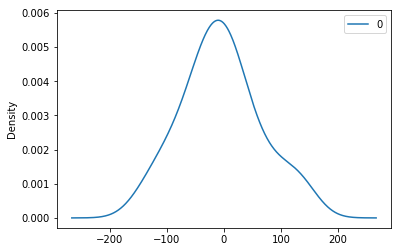

In [56]:
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()

In [57]:
# summary stats of residuals
print(residuals.describe())

                0
count   35.000000
mean    -5.495254
std     68.132879
min   -133.296630
25%    -42.477923
50%     -7.186696
75%     24.748294
max    133.237951


In [58]:
# evaluate an ARIMA model using a walk-forward validation
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
# load dataset
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')
series = read_csv('Data\shampoo-sales.csv', header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)

# split into train and test sets
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

C:\Users\sbean\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1360: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Users\sbean\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1363: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\Users\sbean\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1369: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an arra

predicted=349.117623, expected=342.300000
predicted=306.512928, expected=339.700000
predicted=387.376405, expected=440.400000
predicted=348.154206, expected=315.900000
predicted=386.308782, expected=439.300000
predicted=356.082061, expected=401.300000
predicted=446.379487, expected=437.400000
predicted=394.737317, expected=575.500000
predicted=434.915513, expected=407.600000
predicted=507.923355, expected=682.000000
predicted=435.482830, expected=475.300000
predicted=652.743749, expected=581.300000
predicted=546.343527, expected=646.900000
Test RMSE: 83.417


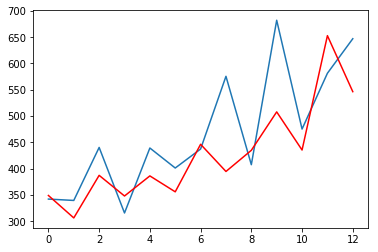

In [59]:
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [66]:
# create lagged dataset
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']

# split into train and test sets
X = dataframe.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

# persistence model on training set
train_pred = [x for x in train_X]

# calculate residuals
train_resid = [train_y[i]-train_pred[i] for i in range(len(train_pred))]

# model the training set residuals
model = AR(train_resid)
model_fit = model.fit()
window = model_fit.k_ar
coef = model_fit.params

# walk forward over time steps in test
history = train_resid[len(train_resid)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
expected_error = list()
for t in range(len(test_y)):
    # persistence
    yhat = test_X[t]
    error = test_y[t] - yhat
    expected_error.append(error)
    # predict error
    length = len(history)
    lag = [history[i] for i in range(length-window,length)]
    pred_error = coef[0]
    
    for d in range(window):
        pred_error += coef[d+1] * lag[window-d-1]
        predictions.append(pred_error)
        history.append(error)
        print('predicted error=%f, expected error=%f' % (pred_error, error))

predicted error=-0.748199, expected error=9.000000
predicted error=6.252326, expected error=9.000000
predicted error=4.785426, expected error=9.000000
predicted error=2.029343, expected error=9.000000
predicted error=-0.934184, expected error=9.000000
predicted error=-0.396512, expected error=9.000000
predicted error=2.156690, expected error=9.000000
predicted error=2.156690, expected error=9.000000
predicted error=0.558922, expected error=9.000000
predicted error=1.516162, expected error=9.000000
predicted error=0.301160, expected error=9.000000
predicted error=1.986629, expected error=9.000000
predicted error=1.853629, expected error=9.000000
predicted error=1.227839, expected error=9.000000
predicted error=1.155523, expected error=9.000000
predicted error=-7.543448, expected error=-10.000000
predicted error=-14.543973, expected error=-10.000000
predicted error=-21.145024, expected error=-10.000000
predicted error=-27.346209, expected error=-10.000000
predicted error=-32.680559, expe

predicted error=-10.006710, expected error=1.000000
predicted error=-10.325790, expected error=1.000000
predicted error=-10.546699, expected error=1.000000
predicted error=-10.827611, expected error=1.000000
predicted error=-11.093610, expected error=1.000000
predicted error=-11.343926, expected error=1.000000
predicted error=-11.416242, expected error=1.000000
predicted error=-0.748199, expected error=-6.000000
predicted error=-1.526035, expected error=-6.000000
predicted error=-2.259485, expected error=-6.000000
predicted error=-2.948506, expected error=-6.000000
predicted error=-3.541211, expected error=-6.000000
predicted error=-4.078884, expected error=-6.000000
predicted error=-4.504418, expected error=-6.000000
predicted error=-4.753030, expected error=-6.000000
predicted error=-4.952751, expected error=-6.000000
predicted error=-5.112291, expected error=-6.000000
predicted error=-5.222746, expected error=-6.000000
predicted error=-5.363202, expected error=-6.000000
predicted er

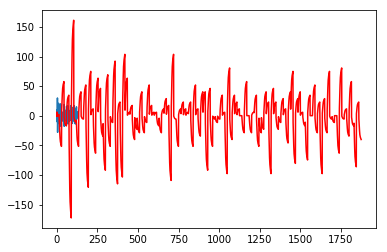

In [67]:
# plot predicted error
pyplot.plot(expected_error)
pyplot.plot(predictions, color='red')
pyplot.show()

In [68]:
# correct the prediction
yhat = yhat + pred_error

In [69]:
# correct forecasts with a model of forecast residual errors
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from statsmodels.tsa.ar_model import AR
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
from math import sqrt

# load data
series = read_csv('Data/daily-total-female-births-in-cal.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

# create lagged dataset
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']

# split into train and test sets
X = dataframe.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

# persistence model on training set
train_pred = [x for x in train_X]

# calculate residuals
train_resid = [train_y[i]-train_pred[i] for i in range(len(train_pred))]

# model the training set residuals
model = AR(train_resid)
model_fit = model.fit()
window = model_fit.k_ar
coef = model_fit.params

# walk forward over time steps in test
history = train_resid[len(train_resid)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(test_y)):
    # persistence
    yhat = test_X[t]
    error = test_y[t] - yhat
    # predict error
    length = len(history)
    lag = [history[i] for i in range(length-window,length)]
    pred_error = coef[0]
    for d in range(window):
        pred_error += coef[d+1] * lag[window-d-1]
    # correct the prediction
    yhat = yhat + pred_error
    predictions.append(yhat)
    history.append(error)
    print('predicted=%f, expected=%f' % (yhat, test_y[t]))
    
# error
rmse = sqrt(mean_squared_error(test_y, predictions))
print('Test RMSE: %.3f' % rmse)

predicted=43.155523, expected=51.000000
predicted=43.891191, expected=41.000000
predicted=44.007486, expected=44.000000
predicted=43.243554, expected=38.000000
predicted=43.511163, expected=68.000000
predicted=48.008736, expected=40.000000
predicted=44.842429, expected=42.000000
predicted=45.050883, expected=51.000000
predicted=45.858415, expected=44.000000
predicted=45.161119, expected=45.000000
predicted=44.758072, expected=36.000000
predicted=45.159826, expected=57.000000
predicted=49.882026, expected=44.000000
predicted=45.182992, expected=42.000000
predicted=44.769363, expected=53.000000
predicted=48.040663, expected=42.000000
predicted=44.566233, expected=34.000000
predicted=43.084498, expected=40.000000
predicted=43.020899, expected=56.000000
predicted=49.457902, expected=44.000000
predicted=45.328116, expected=53.000000
predicted=45.225588, expected=55.000000
predicted=48.705924, expected=39.000000
predicted=44.166344, expected=59.000000
predicted=45.621871, expected=55.000000


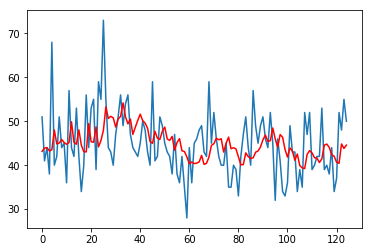

In [70]:
# plot predicted error
pyplot.plot(test_y)
pyplot.plot(predictions, color='red')
pyplot.show()

In [84]:
# load and plot dataset
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot

series = read_csv('Data/shampoo-sales.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

# summarize first few rows
print(series.head())

Month
1-Jan    266.0
2-Jan    145.9
3-Jan    183.1
4-Jan    119.3
5-Jan    180.3
Name: Sales, dtype: float64


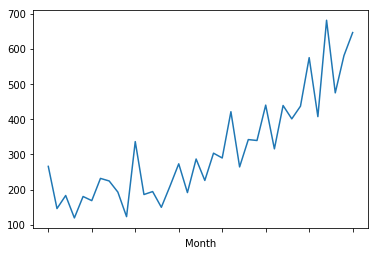

In [85]:
# line plot
series.plot()
pyplot.show()

In [86]:
# autocorrelation plot of time series
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot

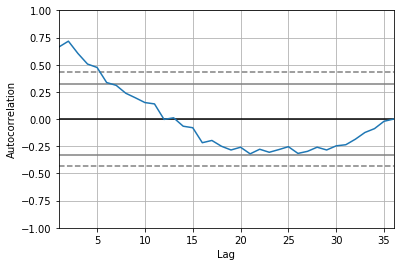

In [87]:
# autocorrelation plot
autocorrelation_plot(series)
pyplot.show()

In [88]:
# fit an ARIMA model and plot residual errors
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot

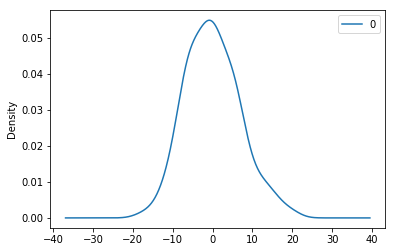

In [91]:
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()

In [92]:
import os
import matplotlib.pyplot as plt
from common.utils import load_data
from common.extract_data import extract_data
%matplotlib inline

ModuleNotFoundError: No module named 'common'

In [102]:
import pandas as pd
ted = pd.read_csv('Data/data_energy.csv')

In [103]:
ted.head()

,timestamp,load,temp
0,2012-01-01 00:00:00,2698.0,32.000000
1,2012-01-01 01:00:00,2558.0,32.666667
2,2012-01-01 02:00:00,2444.0,30.000000
3,2012-01-01 03:00:00,2402.0,31.000000
4,2012-01-01 04:00:00,2403.0,32.000000


In [105]:
energy = ted[['timestamp','load']]

In [110]:
energy['DateTime'] = pd.to_datetime(energy['timestamp'])

In [111]:
energy.head()

,timestamp,load,DateTime
0,2012-01-01 00:00:00,2698.0,2012-01-01 00:00:00
1,2012-01-01 01:00:00,2558.0,2012-01-01 01:00:00
2,2012-01-01 02:00:00,2444.0,2012-01-01 02:00:00
3,2012-01-01 03:00:00,2402.0,2012-01-01 03:00:00
4,2012-01-01 04:00:00,2403.0,2012-01-01 04:00:00


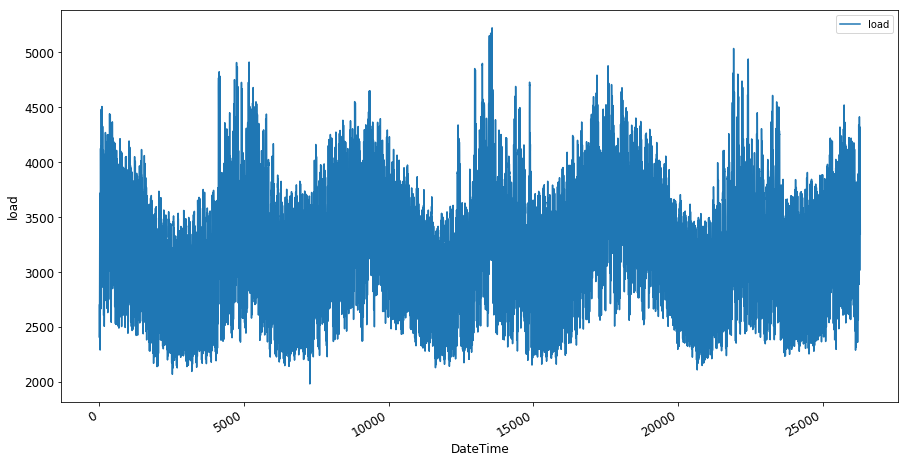

In [115]:
energy.plot(y='load', subplots=True, figsize=(15, 8), fontsize=12)
plt.xlabel('DateTime', fontsize=12)
plt.ylabel('load', fontsize=12)
plt.show()

In [118]:
energy['2014-07-01':'2014-07-07'].plot(y='load', subplots=True, figsize=(15, 8), fontsize=12)
plt.xlabel('DateTime', fontsize=12)
plt.ylabel('load', fontsize=12)
plt.show()

TypeError: cannot do slice indexing on <class 'pandas.core.indexes.range.RangeIndex'> with these indexers [2014-07-01] of <class 'str'>

In [117]:
energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26304 entries, 0 to 26303
Data columns (total 3 columns):
timestamp    26304 non-null object
load         26304 non-null float64
DateTime     26304 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 616.6+ KB


In [120]:
import os
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
import math

from pandas.tools.plotting import autocorrelation_plot

# from pyramid.arima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import MinMaxScaler
from IPython.display import Image

%matplotlib inline
pd.options.display.float_format = '{:,.2f}'.format
np.set_printoptions(precision=2)
warnings.filterwarnings("ignore") # specify to ignore warning messages

In [121]:
train_start_dt = '2014-11-01 00:00:00'
test_start_dt = '2014-12-30 00:00:00'  

In [122]:
energy[(energy.index < test_start_dt) & (energy.index >= train_start_dt)][['load']].rename(columns={'load':'train'}) \
    .join(energy[test_start_dt:][['load']].rename(columns={'load':'test'}), how='outer') \
    .plot(y=['train', 'test'], figsize=(15, 8), fontsize=12)
plt.xlabel('timestamp', fontsize=12)
plt.ylabel('load', fontsize=12)
plt.show()

TypeError: '<' not supported between instances of 'numpy.ndarray' and 'numpy.ndarray'

In [123]:
train = energy.copy()[(energy.index >= train_start_dt) & (energy.index < test_start_dt)][['load']]
test = energy.copy()[energy.index >= test_start_dt][['load']]

print('Training data shape: ', train.shape)
print('Test data shape: ', test.shape)

TypeError: '>=' not supported between instances of 'numpy.ndarray' and 'numpy.ndarray'